# INTERNSAVY 

# Data Science Internship
# - Anisha Walde

# Task 3 : Customer Segmentation Analysis with Python 

**Objective:** To perform customer segmentation analysis using Python to understand customer characteristics, tailor marketing strategies, and enhance overall business accuracy and effectiveness.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('marketing_campaign.csv', sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [4]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [22]:
data.shape

(2216, 42)

In [23]:
data.size

93072

In [5]:
data.index

RangeIndex(start=0, stop=2240, step=1)

In [6]:
# Check for missing values
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Data Preprocessing

In [9]:
data.dropna(inplace=True)

In [10]:
# Convert 'Dt_Customer' column to a datetime format
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [11]:
# Create a 'Age' column from 'Year_Birth'
current_year = 2023
data['Age'] = current_year - data['Year_Birth']


# Exploratory Data Analysis (EDA)

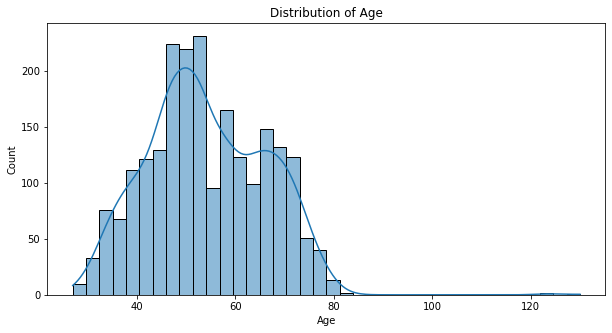

In [12]:
# Distribution of Age
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Feature Selection

In [13]:
# Drop 'ID' and 'Year_Birth' columns
data = data.drop(['ID', 'Year_Birth'], axis=1)


data = pd.get_dummies(data, columns=['Education', 'Marital_Status'])

# Standardize or Normalize Features

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Income', 'Age', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts']] = scaler.fit_transform(data[['Income', 'Age', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts']])


# Customer Segmentation

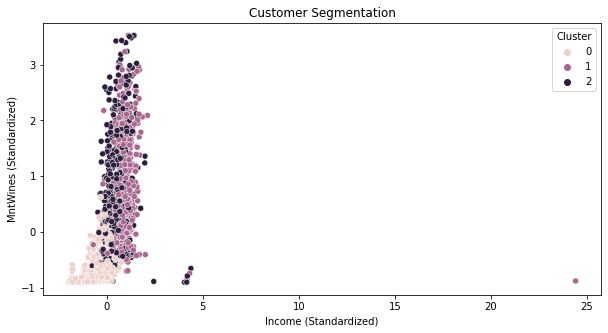

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
data['Cluster'] = kmeans.fit_predict(data[['Income', 'Age', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts']])

# Visualize the clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='Income', y='MntWines', hue='Cluster')
plt.title('Customer Segmentation')
plt.xlabel('Income (Standardized)')
plt.ylabel('MntWines (Standardized)')
plt.show()

# Dimensionality Reduction
To consider dimensionality reduction techniques like Principal Component Analysis (PCA) to reduce the number of features while preserving most of the variance in the data.

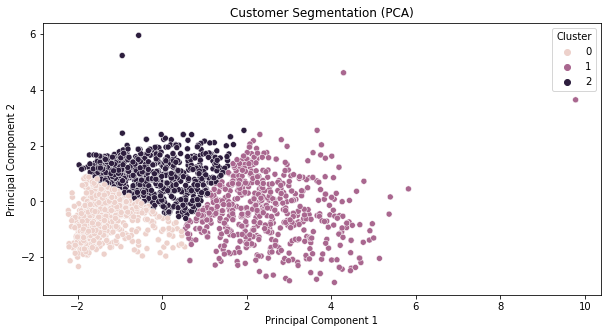

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data[['Income', 'Age', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts']])
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

# Perform clustering on the reduced data
kmeans = KMeans(n_clusters=3, random_state=0)
data['Cluster'] = kmeans.fit_predict(data[['PCA1', 'PCA2']])

plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster')
plt.title('Customer Segmentation (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [17]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_avg = silhouette_score(data[['Income', 'Age', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts']], data['Cluster'])
davies_bouldin = davies_bouldin_score(data[['Income', 'Age', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts']], data['Cluster'])

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

Silhouette Score: 0.28883727318986
Davies-Bouldin Index: 1.2636620986822127


# Customer Personality Analysis

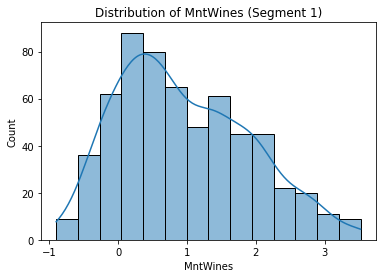

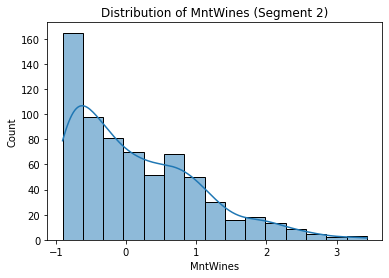

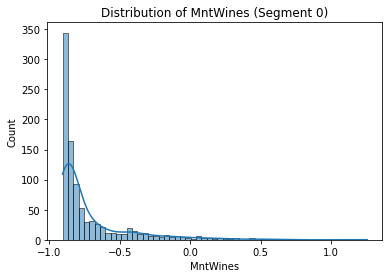

In [18]:
# EDA within each segment
for cluster_id in data['Cluster'].unique():
    segment_data = data[data['Cluster'] == cluster_id]
    
    sns.histplot(segment_data['MntWines'], kde=True)
    plt.title(f'Distribution of MntWines (Segment {cluster_id})')
    plt.xlabel('MntWines')
    plt.ylabel('Count')
    plt.show()

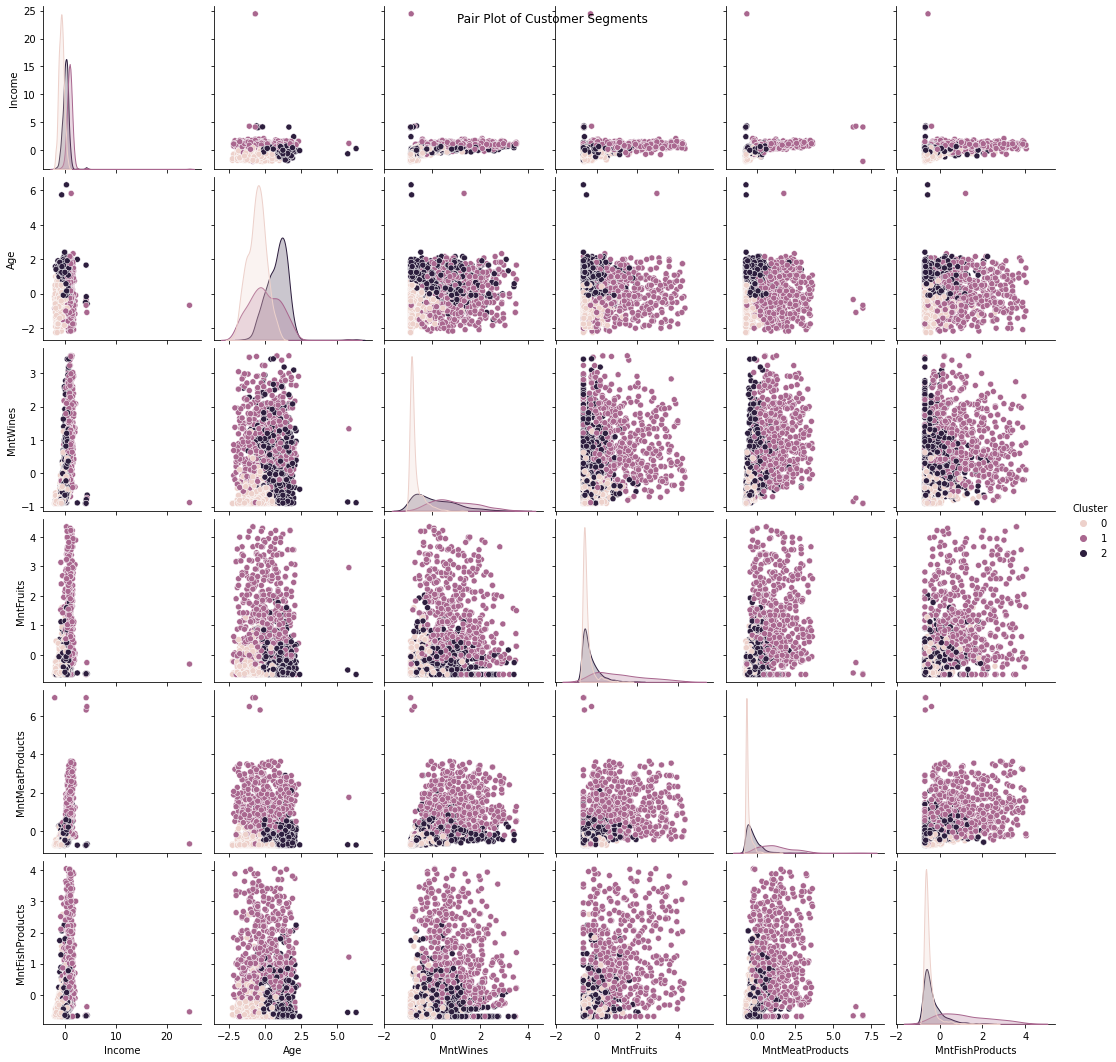

In [19]:
sns.pairplot(data, hue='Cluster', vars=['Income', 'Age', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts'])
plt.suptitle("Pair Plot of Customer Segments")
plt.show()


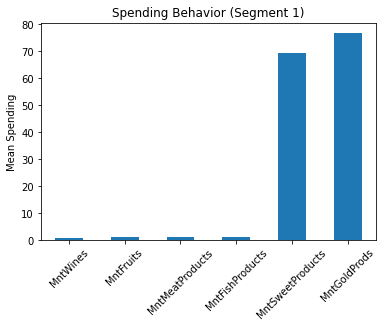

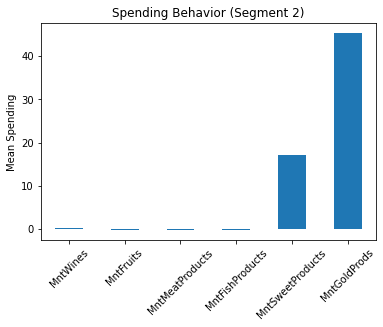

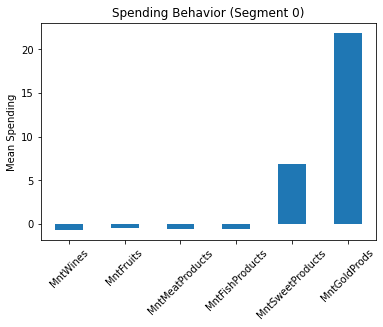

In [20]:
# Behavioral analysis for each segment
for cluster_id in data['Cluster'].unique():
    segment_data = data[data['Cluster'] == cluster_id]
    
    spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
    segment_data[spending_columns].mean().plot(kind='bar')
    plt.title(f'Spending Behavior (Segment {cluster_id})')
    plt.ylabel('Mean Spending')
    plt.xticks(rotation=45)
    plt.show()

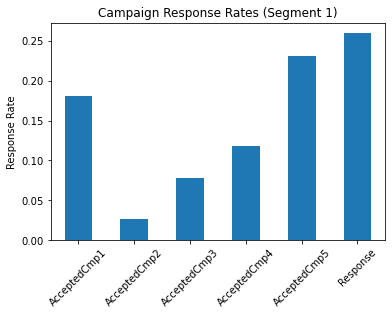

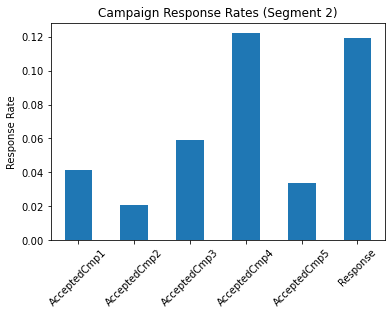

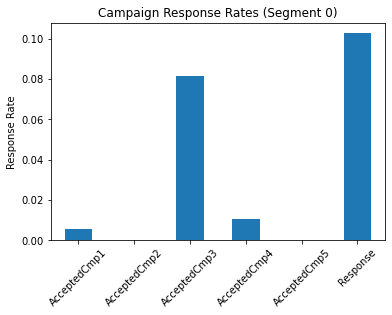

In [21]:
# Response and campaign analysis for each segment
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
for cluster_id in data['Cluster'].unique():
    segment_data = data[data['Cluster'] == cluster_id]
    
    campaign_response = segment_data[campaign_columns].mean()
    campaign_response.plot(kind='bar')
    plt.title(f'Campaign Response Rates (Segment {cluster_id})')
    plt.ylabel('Response Rate')
    plt.xticks(rotation=45)
    plt.show()

**Thank you!**